# Buscador de Llaves
### Ejemplo de Aplicación
Pensemos en un sistema que permita ser localizado a partir de la emisión de un sonido de alarma disparado ante la detección de un silbido.
Encuadremos nuestra aplicación en pensandolo como un producto que deberá competir con otros en precio y prestaciones.
Con el fin de simplificar el diseño mecánico del sistema, el dispositivo deberá detenerse cuando detecte 3 (tres) silbidos consecutivos.
<center><img src="silbido.png"></center>

Para manipular los archivos de audio desde la jupyter notebook se recomineda instalar *librosa*.


conda install -c conda-forge librosa

In [30]:
from scipy import fft
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
from IPython.lib.display import Audio


# Señal n° 1

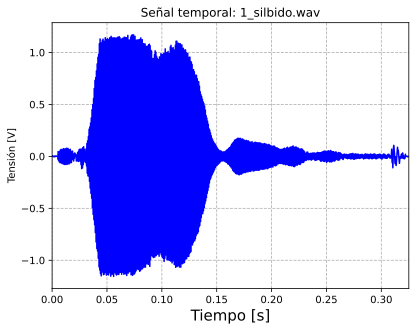

In [31]:
# Nombre de archivo
ruta_silbido = '1_silbido.wav'          
# Frecuencia de muestreo y datos de la señal
fs_silbido, data_silbido = wavfile.read(ruta_silbido)   

# Definición de parámetro temporales
# Tiempo de muestreo
ts_silbido = 1 / fs_silbido         
# Número de muestras en el archivo de audio
N_silbido = len(data_silbido)                
# Vector de tiempo
t_silbido = np.linspace(0, N_silbido * ts_silbido, N_silbido)   
# Se extrae un canal de la pista de audio (si el audio es estereo)
# [:, 1]    
senial_silbido = data_silbido        
# Se escala la señal a voltios (considerando un CAD de 16bits y Vref 3.3V)
senial_silbido = senial_silbido * 3.3 / (2 ** 16 - 1)

# Se grafica la señal temporal
#plt.figure(figsize=(10, 10))
plt.plot(t_silbido, senial_silbido,color='blue')
plt.xlabel('Tiempo [s]', fontsize=15)
plt.ylabel('Tensión [V]', fontsize=10)
plt.title('Señal temporal: '+ ruta_silbido, fontsize=12)
plt.xlim([0, ts_silbido*N_silbido])
plt.grid(linestyle='dashed')

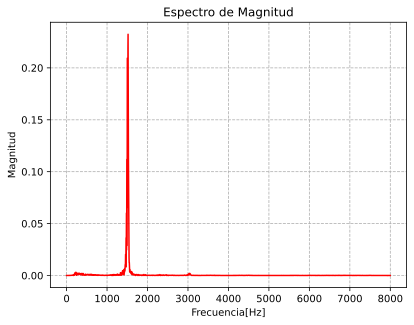

In [32]:
#################### Cálculo de la Transformada de Fourier ###################

# Se genera el vector de frecuencias
freq_silbido = fft.fftfreq(N_silbido, d=1/fs_silbido)   
# Se calcula la transformada rápida de Fourier
silbido_fft  = fft.fft(senial_silbido)    

# El espectro es simétrico, nos quedamos solo con el semieje positivo
f_silbido   = freq_silbido[np.where(freq_silbido >= 0)]      
silbido_fft = silbido_fft[np.where(freq_silbido >= 0)]

# Se calcula la magnitud del espectro
silbido_fft_mod = np.abs(silbido_fft) / N_silbido     
''' Respetando la relación de Parseval. Al haberse descartado la mitad del espectro, para conservar la energía 
    original de la señal, se debe multiplicar la mitad restante por dos (excepto en 0 y fm/2)
'''
silbido_fft_mod[1:len(silbido_fft_mod-1)] = 2 * silbido_fft_mod[1:len(silbido_fft_mod-1)]

#Ahora graficamos el espectro
plt.plot(f_silbido,silbido_fft_mod,color='red')
plt.xlabel("Frecuencia[Hz]")
plt.ylabel("Magnitud")
plt.title('Espectro de Magnitud')
plt.grid(linestyle='dashed')
plt.show()


# Señal n° 2

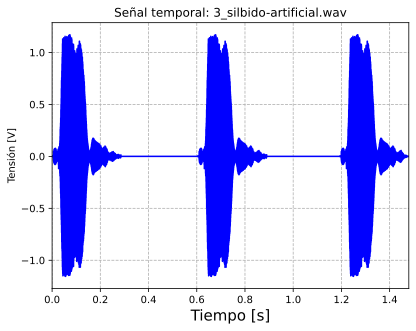

In [33]:
# Nombre de archivo
ruta_silbido_artificial = '3_silbido-artificial.wav'
# Frecuencia de muestreo y datos de la señal
fs_silbido_artificial, data_silbido_artificial = wavfile.read(ruta_silbido_artificial)   

# Definición de parámetro temporales
# Tiempo de muestreo
ts_silbido_artificial = 1 / fs_silbido_artificial    
# Número de muestras en el archivo de audio
N_silbido_artificial  = len(data_silbido_artificial)                   
# Vector de tiempo
t_silbido_artificial  = np.linspace(0, N_silbido_artificial * ts_silbido_artificial, N_silbido_artificial)  
# Se extrae un canal de la pista de audio (si el audio es estereo)
# [:, 1]   
senial_silbido_artificial = data_silbido_artificial    
# Se escala la señal a voltios (considerando un CAD de 16bits y Vref 3.3V)
senial_silbido_artificial = senial_silbido_artificial * 3.3 / (2 ** 16 - 1)

# Se grafica la señal temporal
#plt.figure(figsize=(10, 10))
plt.plot(t_silbido_artificial, senial_silbido_artificial,color='blue')
plt.xlabel('Tiempo [s]', fontsize=15)
plt.ylabel('Tensión [V]', fontsize=10)
plt.title('Señal temporal: '+ ruta_silbido_artificial, fontsize=12)
plt.xlim([0, ts_silbido_artificial*N_silbido_artificial])
plt.grid(linestyle='dashed')

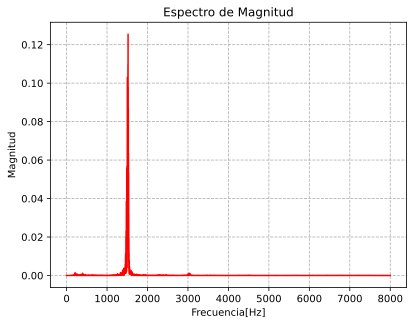

In [34]:
#################### Cálculo de la Transformada de Fourier ###################

# Se genera el vector de frecuencias
freq_silbido_artificial = fft.fftfreq(N_silbido_artificial, d=1/fs_silbido_artificial)
# Se calcula la transformada rápida de Fourier
fft_silbido_artificial  = fft.fft(senial_silbido_artificial)

# El espectro es simétrico, nos quedamos solo con el semieje positivo
f_silbido_artificial   = freq_silbido_artificial[np.where(freq_silbido_artificial >= 0)]      
fft_silbido_artificial = fft_silbido_artificial[np.where(freq_silbido_artificial >= 0)]

# Se calcula la magnitud del espectro 
fft_silbido_artificial_mod = np.abs(fft_silbido_artificial) / N_silbido_artificial
''' Respetando la relación de Parseval. Al haberse descartado la mitad del espectro, para conservar la energía 
    original de la señal, se debe multiplicar la mitad restante por dos (excepto en 0 y fm/2)
'''
fft_silbido_artificial_mod[1:len(fft_silbido_artificial_mod-1)] = 2 * fft_silbido_artificial_mod[1:len(fft_silbido_artificial_mod-1)]

# Ahora graficamos el espectro
plt.plot(f_silbido_artificial,fft_silbido_artificial_mod,color='red')
plt.xlabel("Frecuencia[Hz]")
plt.ylabel("Magnitud")
plt.title('Espectro de Magnitud')
plt.grid(linestyle='dashed')
plt.show()

# Comparación de las señales

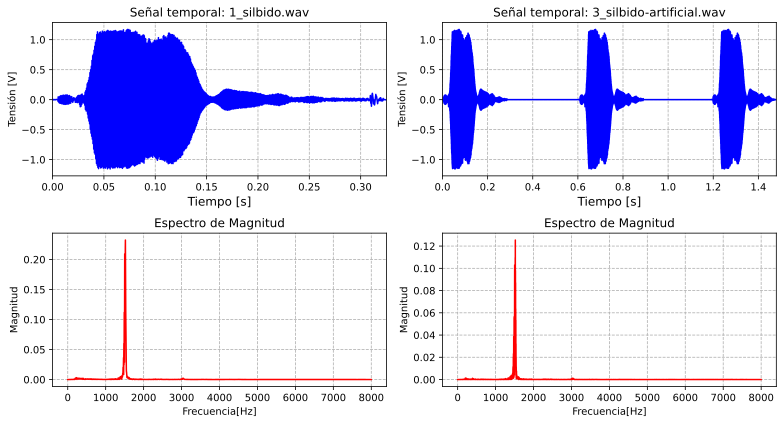

In [35]:
fig, ax = plt.subplots(2,2,figsize=(11,6))

# Primera señal con su plot
ax[0][0].plot(t_silbido, senial_silbido,color='blue')
ax[0][0].set_xlabel('Tiempo [s]', fontsize=12)
ax[0][0].set_ylabel('Tensión [V]', fontsize=10)
ax[0][0].set_title('Señal temporal: '+ ruta_silbido, fontsize=12)
ax[0][0].set_xlim([0, ts_silbido*N_silbido])
ax[0][0].grid(linestyle='dashed')
ax[1][0].plot(f_silbido,silbido_fft_mod,color='red')
ax[1][0].set_xlabel("Frecuencia[Hz]")
ax[1][0].set_ylabel("Magnitud")
ax[1][0].set_title('Espectro de Magnitud',fontsize=12)
ax[1][0].grid(linestyle='dashed')

# Segunda señal con su plot
ax[0][1].plot(t_silbido_artificial, senial_silbido_artificial,color='blue')
ax[0][1].set_xlabel('Tiempo [s]', fontsize=12)
ax[0][1].set_ylabel('Tensión [V]', fontsize=10)
ax[0][1].set_title('Señal temporal: '+ ruta_silbido_artificial, fontsize=12)
ax[0][1].set_xlim([0, ts_silbido_artificial*N_silbido_artificial])
ax[0][1].grid(linestyle='dashed')
ax[1][1].plot(f_silbido_artificial,fft_silbido_artificial_mod,color='red');
ax[1][1].set_xlabel("Frecuencia[Hz]")
ax[1][1].set_ylabel("Magnitud")
ax[1][1].set_title('Espectro de Magnitud',fontsize=12)
ax[1][1].grid(linestyle='dashed')



plt.tight_layout()